In [2]:
import requests 
response = requests.get("https://services3.arcgis.com/Jdnp1TjADvSDxMAX/ArcGIS/rest/services/dnrFisheries/FeatureServer/13/query?outFields=*&where=1%3D1&f=geojson")

In [3]:
data = response.json()


In [34]:
import pandas as pd 
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import random
from itertools import cycle, islice

In [5]:
creel_path = "Michigan_Creel_Data_Harvest1.csv"
creel = pd.read_csv(creel_path)
creel.head()


,OBJECTID,PK,Mode,Site,Year,Month,Species,Effort,AnglerTrips,Harvest,Catch,County,Lake,Port
0,10021,665475,BOAT,1,2012,3,ATL,1823.25,405.17,0.00,0.00,MENOMINEE,MI,MENOMINEE
1,10022,665476,BOAT,1,2012,4,ATL,5103.00,1173.33,0.00,0.00,MENOMINEE,MI,MENOMINEE
2,10023,665477,BOAT,1,2012,5,ATL,1693.78,386.73,0.00,0.00,MENOMINEE,MI,MENOMINEE
3,10024,665478,BOAT,1,2012,6,ATL,4304.25,810.84,0.00,0.00,MENOMINEE,MI,MENOMINEE
4,10025,665479,BOAT,1,2012,7,ATL,15058.44,1679.65,0.00,0.00,MENOMINEE,MI,MENOMINEE


In [6]:
wal = creel.loc[creel["Species"] == "WAE"]

wal = wal.loc[:,['Catch','County']].groupby('County').sum()
wal

,Catch
County,
ALCONA,8163.56
ALGER,12.44
ALLEGAN,117.22
ALPENA,39022.22
ANTRIM,134.00
ARENAC,560017.34
BARAGA,1910.61
BAY,1008732.70
BENZIE,98.67


In [7]:
rainbow = creel.loc[creel["Species"] == "RBT"]
rainbow = rainbow.loc[:,['Catch','County']].groupby('County').sum()
rainbow

,Catch
County,
ALCONA,14457.11
ALGER,9006.84
ALLEGAN,0.00
ALPENA,11776.59
ANTRIM,2899.46
ARENAC,709.80
BARAGA,3034.97
BAY,32.25
BENZIE,10295.11


In [8]:
print(wal.iloc[5,0])

560017.33994802


In [9]:
#walchipmean = creel.loc[(creel["Species"] == "WAE") & 
                        #(creel['County'] == "CHIPPEWA")].groupby('Year').mean()
wal_chip_total = creel.loc[(creel["Species"] == "WAE") & 
                           (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
wal_chip_mean = creel.loc[(creel["Species"] == "WAE") & 
                          (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
wal_chip_median = creel.loc[(creel["Species"] == "WAE") & 
                            (creel["County"]== "CHIPPEWA")].groupby('Year').median()
wal_chip_sd = creel.loc[(creel["Species"] == "WAE") & 
                        (creel["County"]== "CHIPPEWA")].groupby('Year').std()
wal_chip_sem = creel.loc[(creel["Species"] == "WAE") & 
                         (creel["County"]== "CHIPPEWA")].groupby('Year').sem()

walchiptot = wal_chip_total['Catch']
walchipm = wal_chip_mean['Catch']
walchipmed = wal_chip_median['Catch']
walchipsd = wal_chip_sd['Catch']
walchipsem = wal_chip_sem['Catch']
wal_chip_df = pd.DataFrame({'Total Walleye Caught':walchiptot,
                            'Mean Walleye Caught':walchipm, 
                            'Median Walleye Caught':walchipmed, 
                            'Walleye Caught St. Dev.':walchipsd, 
                            "Walleye Caught St. Err.":walchipsem})
wal_chip_df

C:\Users\Kyle\AppData\Local\Temp\ipykernel_11984\1285893771.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
C:\Users\Kyle\AppData\Local\Temp\ipykernel_11984\1285893771.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
C:\Users\Kyle\AppData\Local\Temp\ipykernel_11984\1285893771.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be v

,Total Walleye Caught,Mean Walleye Caught,Median Walleye Caught,Walleye Caught St. Dev.,Walleye Caught St. Err.
Year,,,,,
2012,27032.91,1001.22,0.00,2227.83,428.75
2013,41827.89,972.74,0.00,2435.86,371.47
2014,28776.81,872.02,133.47,2436.70,424.17
2015,27214.00,1088.56,11.00,1865.50,373.10
2016,16935.00,677.40,0.00,1808.10,361.62
2017,41871.00,721.91,12.00,2003.10,263.02
2018,13.43,1.92,0.00,5.08,1.92
2019,41.00,6.83,1.50,11.41,4.66
2020,29.09,2.42,0.00,4.36,1.26


In [10]:
rain_chip_total = creel.loc[(creel["Species"] == "RBT") & 
                           (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
rain_chip_mean = creel.loc[(creel["Species"] == "RBT") & 
                          (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
rain_chip_median = creel.loc[(creel["Species"] == "RBT") & 
                            (creel["County"]== "CHIPPEWA")].groupby('Year').median()
rain_chip_sd = creel.loc[(creel["Species"] == "RBT") & 
                        (creel["County"]== "CHIPPEWA")].groupby('Year').std()
rain_chip_sem = creel.loc[(creel["Species"] == "RBT") & 
                         (creel["County"]== "CHIPPEWA")].groupby('Year').sem()

rainchiptot = rain_chip_total['Catch']
rainchipm = rain_chip_mean['Catch']
rainchipmed = rain_chip_median['Catch']
rainchipsd = rain_chip_sd['Catch']
rainchipsem = rain_chip_sem['Catch']
rain_chip_df = pd.DataFrame({'Total Trout Caught':rainchiptot,
                            'Mean Trout Caught':rainchipm, 
                            'Median Trout Caught':rainchipmed, 
                            'Trout Caught St. Dev.':rainchipsd, 
                            "Trout Caught St. Err.":rainchipsem})
rain_chip_df

C:\Users\Kyle\AppData\Local\Temp\ipykernel_11984\4034222039.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').sum()
C:\Users\Kyle\AppData\Local\Temp\ipykernel_11984\4034222039.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (creel["County"]== "CHIPPEWA")].groupby('Year').mean()
C:\Users\Kyle\AppData\Local\Temp\ipykernel_11984\4034222039.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be v

,Total Trout Caught,Mean Trout Caught,Median Trout Caught,Trout Caught St. Dev.,Trout Caught St. Err.
Year,,,,,
2012,46.22,1.71,0.00,6.37,1.23
2013,77.30,1.80,0.00,5.54,0.84
2014,528.71,16.02,0.00,39.86,6.94
2015,18.00,0.72,0.00,2.56,0.51
2016,109.00,4.36,0.00,9.96,1.99
2017,4482.00,77.28,0.00,307.05,40.32
2018,46.63,6.66,0.00,9.53,3.60
2019,77.00,12.83,0.00,22.17,9.05
2020,90.35,7.53,0.00,15.97,4.61


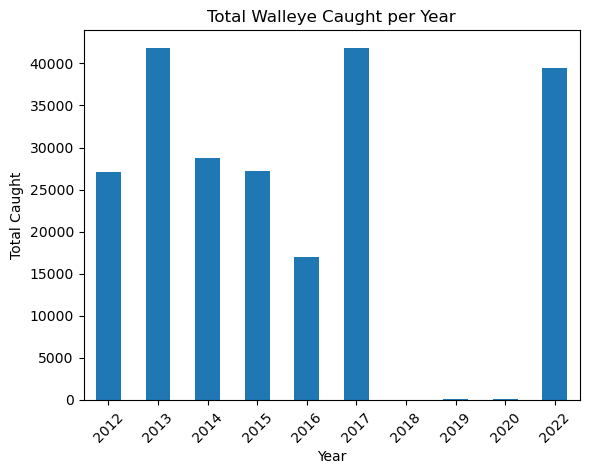

In [27]:
walchiptot.plot.bar()
plt.xlabel('Year')
plt.ylabel('Total Caught')
plt.title('Total Walleye Caught per Year')
plt.xticks(rotation=45)
plt.show()

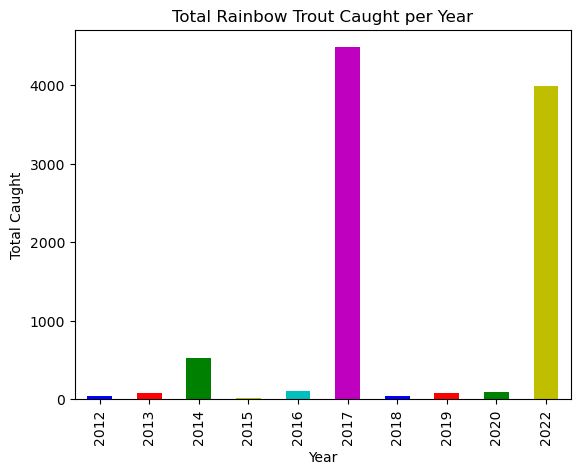

In [38]:
rainchiptot.plot.bar()
plt.xlabel('Year')
plt.ylabel('Total Caught')
plt.title('Total Rainbow Trout Caught per Year')
plt.xticks(rotation=45)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(rainchipm)))
rainchiptot.plot.bar(color = my_colors)

plt.show()

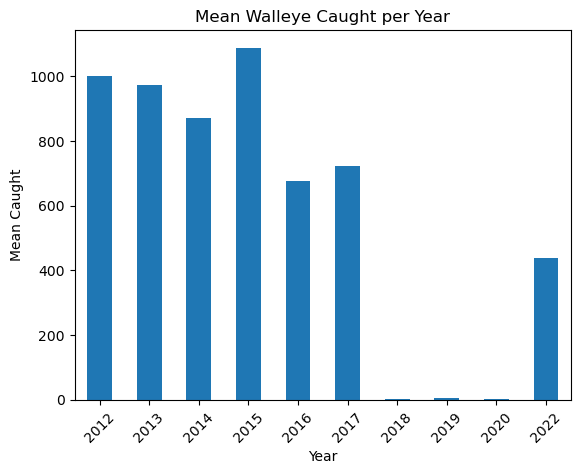

In [32]:
walchipm.plot.bar()
plt.xlabel('Year')
plt.ylabel('Mean Caught')
plt.title('Mean Walleye Caught per Year')

plt.xticks(rotation=45)
plt.show()

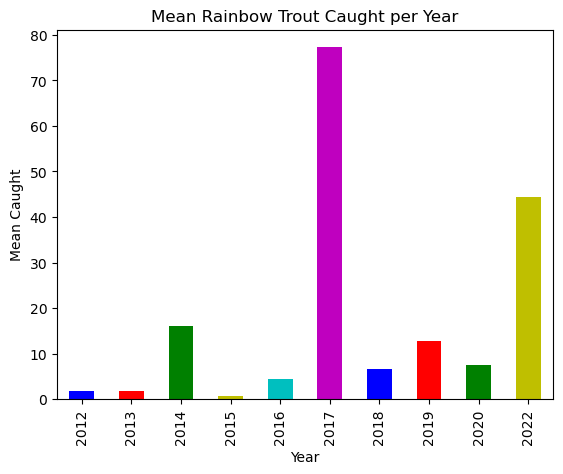

In [37]:

plt.xlabel('Year')
plt.ylabel('Mean Caught')
plt.title('Mean Rainbow Trout Caught per Year')
plt.xticks(rotation=45)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c', 'm']), None, len(rainchipm)))
rainchipm.plot.bar(color = my_colors)
plt.show()